In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

import os
for dirname, _, filenames in os.walk(r'C:\Users\Sukanmi\Desktop\segun\segun dataset\Coca Cola.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
# Reading the data

df=pd.read_csv(r'C:\Users\Sukanmi\Desktop\segun\segun database\coca cola\Coca Cola.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,46.939999,47.220001,46.560001,46.930000,39.828789,11603700
1,2019-01-03,46.820000,47.369999,46.529999,46.639999,39.582672,14714400
2,2019-01-04,46.750000,47.570000,46.639999,47.570000,40.371952,13013700
3,2019-01-07,47.570000,47.750000,46.900002,46.950001,39.845768,13135500
4,2019-01-08,47.250000,47.570000,47.040001,47.480000,40.295567,15420700


In [5]:
#Exploratory Data Analysis

print(df.describe())
print(df.dtypes)

              Open         High          Low        Close    Adj Close  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean     55.284014    55.685572    54.846208    55.266399    50.890645   
std       5.686688     5.681123     5.703617     5.709911     7.065449   
min      38.759998    38.889999    36.270000    37.560001    33.175083   
25%      50.975001    51.315000    50.470001    50.862500    45.064361   
50%      55.004999    55.365000    54.754999    55.025000    50.465061   
75%      60.200001    60.630001    59.747500    60.227500    57.792684   
max      67.000000    67.199997    65.720001    66.209999    62.319378   

             Volume  
count  1.258000e+03  
mean   1.509419e+07  
std    6.928657e+06  
min    3.265500e+06  
25%    1.094472e+07  
50%    1.366025e+07  
75%    1.717058e+07  
max    6.784570e+07  
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume   

working on plotting to have a better idea of what this stock behaves like

Text(0.5, 1.0, 'KO Price Over the Years 2019-2024')

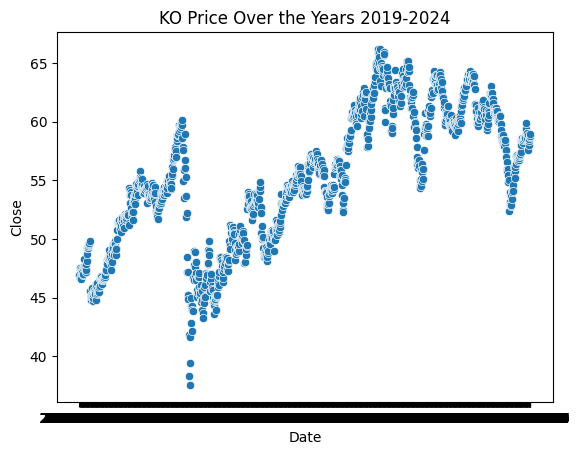

In [6]:
sns.scatterplot(data=df, x="Date",y="Close")
plt.title("KO Price Over the Years 2019-2024")

Text(0.5, 1.0, 'KO Trading Volume over the Years 2019-2024')

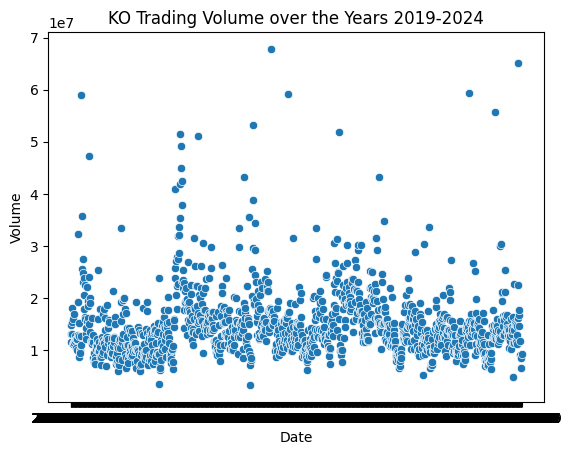

In [7]:
sns.scatterplot(data=df, x="Date", y="Volume")
plt.title("KO Trading Volume over the Years 2019-2024")

In [9]:
#Preparing some date columns
# Convert 'Date' column to datetime format
# Convert 'Year' and 'Month' columns to datetime format

#df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str), format='%Y-%m')

##df["Year"]=df["Date"].dt.year
##df["Month"]=df["Date"].dt.month
# Group by 'Year' and 'Month' and calculate the median of 'Close'
##df.groupby(["Year", "Month"])["Close"].median()

#df.groupby("Year")["Close"].median()

import pandas as pd

# Assuming 'Date' column already exists in the DataFrame
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime format

# Create 'Year' and 'Month' columns from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by 'Year' and 'Month' and calculate the median of 'Close'
median_close_by_year_month = df.groupby(["Year", "Month"])["Close"].median()


Let's see in greater detail how the stock behaved on a yearly basis¶

In [11]:
#This snippet of code uses a for loop to subset the DF for each year and substract the closing value of the stock from the end of the year minus the beginning of the year

years_list=[2019,2020,2021,2022,2023]
stock_growth=[]
for years in years_list:
    delta=(df['Close'][df['Year']==years].iloc[-1] - df['Close'][df['Year']==years].iloc[0]).round(2)
    stock_growth.append(delta)
    print("Coke Stock experienced a ${} growth in the year {}".format(delta,years))

Coke Stock experienced a $8.42 growth in the year 2019
Coke Stock experienced a $-0.15 growth in the year 2020
Coke Stock experienced a $6.45 growth in the year 2021
Coke Stock experienced a $4.31 growth in the year 2022
Coke Stock experienced a $-4.02 growth in the year 2023


In [13]:
#Create 2 new DFs with data based off the 4th quarter and the rest of the year.
#fourth_quarter=df[df['Date'].dt.quarter==4]
#fourth_quarter.groupby("Year")["Close"].agg(["mean","median"])
#rest_of_the_year=df[df["Date"].dt.quarter!=4]

# Assuming 'Date' column already exists in the DataFrame
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime format

# Create 'Year' and 'Month' columns from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by 'Year' and 'Month' and calculate the median of 'Close'
median_close_by_year_month = df.groupby(["Year", "Month"])["Close"].median()

# Display the resulting DataFrame and the calculated median
print("DataFrame with 'Year' and 'Month' columns:")
print(df)

print("\nMedian of 'Close' by Year and Month:")
print(median_close_by_year_month)


DataFrame with 'Year' and 'Month' columns:
           Date       Open       High        Low      Close  Adj Close  \
0    2019-01-02  46.939999  47.220001  46.560001  46.930000  39.828789   
1    2019-01-03  46.820000  47.369999  46.529999  46.639999  39.582672   
2    2019-01-04  46.750000  47.570000  46.639999  47.570000  40.371952   
3    2019-01-07  47.570000  47.750000  46.900002  46.950001  39.845768   
4    2019-01-08  47.250000  47.570000  47.040001  47.480000  40.295567   
...         ...        ...        ...        ...        ...        ...   
1253 2023-12-22  58.119999  58.459999  58.020000  58.320000  57.857216   
1254 2023-12-26  58.060001  58.709999  58.060001  58.560001  58.095314   
1255 2023-12-27  58.639999  58.770000  58.400002  58.709999  58.244122   
1256 2023-12-28  58.650002  58.869999  58.529999  58.750000  58.283806   
1257 2023-12-29  58.740002  58.980000  58.630001  58.930000  58.462376   

        Volume  Year  Month  
0     11603700  2019      1  
1     14

In [15]:
# Assuming 'Date' is a datetime column, we can extract the quarter information

#rest_of_the_year['Quarter'] = rest_of_the_year['Date'].dt.quarter
#fourth_quarter['Quarter'] = fourth_quarter['Date'].dt.quarter

# Assuming 'Date' is a datetime column, we can extract the quarter information
rest_of_the_year['Quarter'] = rest_of_the_year['Date'].dt.quarter
fourth_quarter['Quarter'] = fourth_quarter['Date'].dt.quarter

# Display the resulting DataFrames
print("DataFrame for rest of the year with 'Quarter' column:")
print(rest_of_the_year)

print("\nDataFrame for fourth quarter with 'Quarter' column:")
print(fourth_quarter)


DataFrame for rest of the year with 'Quarter' column:
           Date       Open       High        Low      Close  Adj Close  \
0    2019-01-02  46.939999  47.220001  46.560001  46.930000  39.828789   
1    2019-01-03  46.820000  47.369999  46.529999  46.639999  39.582672   
2    2019-01-04  46.750000  47.570000  46.639999  47.570000  40.371952   
3    2019-01-07  47.570000  47.750000  46.900002  46.950001  39.845768   
4    2019-01-08  47.250000  47.570000  47.040001  47.480000  40.295567   
...         ...        ...        ...        ...        ...        ...   
1190 2023-09-25  57.400002  57.490002  56.740002  57.000000  56.100983   
1191 2023-09-26  56.730000  56.900002  56.400002  56.529999  55.638393   
1192 2023-09-27  56.419998  56.529999  55.680000  55.950001  55.067543   
1193 2023-09-28  56.230000  56.320000  55.700001  55.810001  54.929752   
1194 2023-09-29  56.139999  56.270000  55.619999  55.980000  55.097069   

        Volume  Year  Month  Quarter  
0     11603700  20

C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_13172\1013251354.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_of_the_year['Quarter'] = rest_of_the_year['Date'].dt.quarter
C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_13172\1013251354.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fourth_quarter['Quarter'] = fourth_quarter['Date'].dt.quarter


Text(0.5, 1.0, 'KO Growth per Quarter')

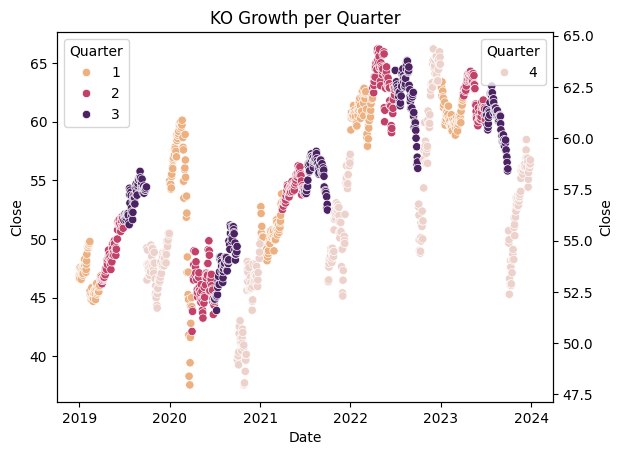

In [16]:
##fig,ax=plt.subplots()
##sns.scatterplot(data=rest_of_the_year,x="Date",y="Close", ax=ax, hue='Quarter', palette="flare")
##ax2=ax.twinx()
##sns.scatterplot(data=fourth_quarter,x="Date",y="Close", ax=ax2,hue="Quarter")
##plt.title("KO Growth per Quarter")


fig,ax=plt.subplots()
sns.scatterplot(data=rest_of_the_year,x="Date",y="Close", ax=ax, hue='Quarter', palette="flare")
ax2=ax.twinx()
sns.scatterplot(data=fourth_quarter,x="Date",y="Close", ax=ax2,hue="Quarter")
plt.title("KO Growth per Quarter")


In [17]:
# Check the column names in the DataFrame
print(rest_of_the_year.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year',
       'Month', 'Quarter'],
      dtype='object')


Ok let's wrap it up and do our hypothesis test using Pingouin's T-Test method.
Let's assume alpha=0.05
We'll calculate the median and the mean of the 1st 3 quarters of the year vs the last quarter then use Pingouin to do our T-Test¶

In [29]:
#Now that we have our 2 datasets we can calculate mean and median

four_performance=fourth_quarter.groupby("Year")["Close"].agg(["mean","median"])
rest_performance=rest_of_the_year.groupby("Year")["Close"].agg(["mean","median"])
results=pg.ttest(four_performance['median'],rest_performance['median'])
print(results)
results2=results=pg.ttest(four_performance['mean'],rest_performance['mean'])
print(results2)

               T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test  0.356761    8   two-sided  0.730498  [-6.28, 8.58]  0.225636  0.512   

           power  
T-test  0.061524  
               T  dof alternative     p-val         CI95%   cohen-d   BF10  \
T-test  0.167611    8   two-sided  0.871049  [-6.57, 7.6]  0.106006  0.497   

           power  
T-test  0.052532  


The P-Val is significantly greater than our alpha value of 0.05 so our hypothesis has been rejected 😑¶
Let's now do a T-Test of the growth of the first 3 quarters vs the growth of the last quarter

In [30]:
years_list=[2019,2020,2021,2022,2023]
stock_growth_q=[]
for years in years_list:
    delta=(fourth_quarter['Close'][fourth_quarter['Year']==years].iloc[-1] - fourth_quarter['Close'][fourth_quarter['Year']==years].iloc[0]).round(2)
    stock_growth_q.append(delta)
    print("Coke Stock experienced a ${} growth in the fourth quarter of year {}".format(delta,years))
stock_growth_q

Coke Stock experienced a $0.7 growth in the fourth quarter of year 2019
Coke Stock experienced a $5.66 growth in the fourth quarter of year 2020
Coke Stock experienced a $6.19 growth in the fourth quarter of year 2021
Coke Stock experienced a $6.96 growth in the fourth quarter of year 2022
Coke Stock experienced a $3.45 growth in the fourth quarter of year 2023


[np.float64(0.7),
 np.float64(5.66),
 np.float64(6.19),
 np.float64(6.96),
 np.float64(3.45)]

In [31]:
years_list=[2019,2020,2021,2022,2023]
stock_growth_y=[]
for years in years_list:
    delta=(rest_of_the_year['Close'][rest_of_the_year['Year']==years].iloc[-1] - rest_of_the_year['Close'][rest_of_the_year['Year']==years].iloc[0]).round(2)
    stock_growth_y.append(delta)
    print("Coke Stock experienced a ${} growth in the fourth quarter of year {}".format(delta,years))
stock_growth_y

Coke Stock experienced a $7.51 growth in the fourth quarter of year 2019
Coke Stock experienced a $-5.62 growth in the fourth quarter of year 2020
Coke Stock experienced a $-0.29 growth in the fourth quarter of year 2021
Coke Stock experienced a $-3.28 growth in the fourth quarter of year 2022
Coke Stock experienced a $-6.97 growth in the fourth quarter of year 2023


[np.float64(7.51),
 np.float64(-5.62),
 np.float64(-0.29),
 np.float64(-3.28),
 np.float64(-6.97)]

In [32]:
results_3=pg.ttest(stock_growth_q,stock_growth_y)
print(results_3)

               T  dof alternative     p-val           CI95%   cohen-d   BF10  \
T-test  2.247867    8   two-sided  0.054749  [-0.16, 12.81]  1.421676  1.763   

          power  
T-test  0.50658  


Our P-value this time came out to be 0.054 which is just slightly above our alpha value...our hypothesis has been rejected again but by a tiny margin this time.